<a href="https://colab.research.google.com/github/gibranfp/CursoAprendizajeProfundo/blob/master/notebooks/1f_convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
try:
  %tensorflow_version 2.x
except Exception:
  pass

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.datasets import load_digits

TensorFlow 2.x selected.


## Carga conjunto de datos de dígitos 
Vamos a cargar el conjunto de datos de díogitos usando la biblioteca `scikit-learn`:

In [0]:
digits = load_digits() 
zeros_ones = digits.target < 2
data = digits.images[zeros_ones]
labels = digits.target[zeros_ones]

Este conjuntos de datos está compuesto por imágenes de $8 \times 8$ de los dígitos $0-9$. Visualicemos 2 instancias de los dígitos $0$ y $1$:

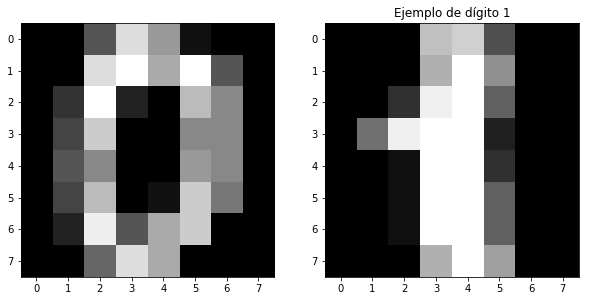

In [3]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(data[0], cmap = 'gray') 
plt.title('Ejemplo de dígito 0')
axs[1].imshow(data[1], cmap = 'gray') 
plt.title('Ejemplo de dígito 1')
plt.show() 

## Operación de correlación cruzada
Ahora consideremos la operación de correlación cruzada entre una imagen $I$ y un filtro $W$:

$$
A(i,j) = (I * W)(i,j) = \sum_m \sum_n I(i + m, j + n) W(m,n) 
$$

La correlación cruzada es una operación similar a la convolución pero sin voltear el filtro. Muchas bibliotecas ocupan la operación de correlación cruzada para implementar las capas convolucionales en lugar de la convolución.

In [0]:
def conv2d(I, W, b, stride = 1):
  h_s = int(np.ceil(float(I.shape[0] - W.shape[0]) / float(stride) + 1))
  w_s = int(np.ceil(float(I.shape[1] - W.shape[1]) / float(stride) + 1))
  a = np.zeros((h_s, w_s))
  for i in range(h_s):
    for j in range(w_s):
      I_m = I[i * stride:i * stride + W.shape[0], j * stride:j * stride + W.shape[1]]
      a[i, j] = (I_m * W).sum()
                  
  return a

## Filtro

Definamos un filtro de $3 \times 3$ que detecte bordes en cierta orientación:

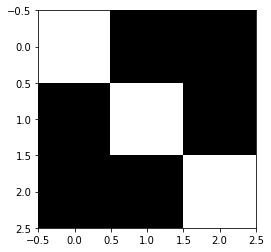

In [9]:
filter = np.zeros((3,3))
np.fill_diagonal(filter, [1, 1, 1])
plt.imshow(filter, cmap = 'gray') 
plt.show()

Aplicando las operaciones de correlación cruzada y convolución de una imagen del dígito $0$ con dicho filtro y al revés obtenemos:

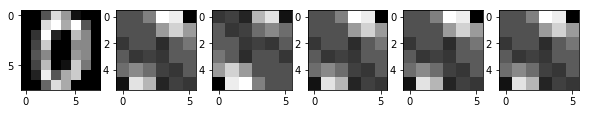

In [10]:
from scipy import signal
ccorr = signal.correlate2d(data[0], filter, mode = 'valid')
ccorr2 = signal.correlate2d(filter, data[0], mode = 'valid') 
conv = signal.convolve2d(data[0], filter, mode = 'valid') 
conv2 = signal.convolve2d(filter, data[0], mode = 'valid') 
a = conv2d(data[0], filter, 0)
fig, axs = plt.subplots(1, 6, figsize=(10, 5))
axs[0].imshow(data[0], cmap = 'gray') 
axs[1].imshow(ccorr, cmap = 'gray') 
axs[2].imshow(ccorr2, cmap = 'gray') 
axs[3].imshow(conv, cmap = 'gray') 
axs[4].imshow(conv2, cmap = 'gray') 
axs[5].imshow(a, cmap = 'gray') 
plt.show()

Observa que el resultado de la correlación cruzada de la imagen con el filtro es diferente al del filtro con la imagen. En contraste, la convolución es conmutativa y produce el mismo resultado en ambos casos.

Haciendo lo mismo para una imagen del dígito $1$:

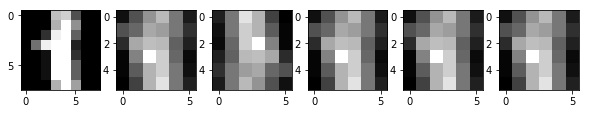

In [12]:
corr = signal.correlate2d(data[1], filter, mode = 'valid')
corr2 = signal.correlate2d(filter, data[1], mode = 'valid') 
conv = signal.convolve2d(data[1], filter, mode = 'valid') 
conv2 = signal.convolve2d(filter, data[1], mode = 'valid') 
a = conv2d(data[1], filter, 0)
fig, axs = plt.subplots(1, 6, figsize=(10, 5))
axs[0].imshow(data[1], cmap = 'gray') 
axs[1].imshow(corr, cmap = 'gray') 
axs[2].imshow(corr2, cmap = 'gray') 
axs[3].imshow(conv, cmap = 'gray') 
axs[4].imshow(conv2, cmap = 'gray') 
axs[5].imshow(a, cmap = 'gray') 
plt.show()